# Importing required libraries

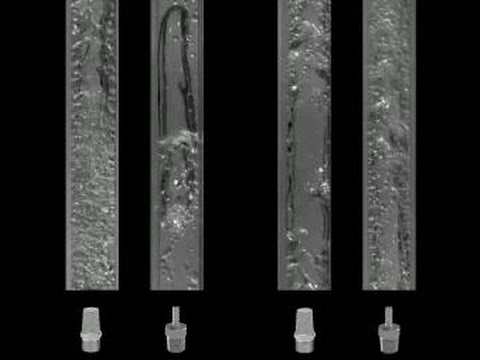

In [39]:
from IPython.display import YouTubeVideo

YouTubeVideo('pkhVxqDg_fk', width=840, height=465)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data files

In [41]:
data = pd.read_csv('../../data/Petroleum2phasedata.csv',sep=';')

# Getting an overview of the data

In [42]:
data.head()

,Class_id,Class_name,Vsl,Vsg,ID,Roughness,Ang,Density_L,Density_G,Visc_L,Visc_G,ST,P,T
0,2,SS,0.029427,0.087232,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
1,5,I,0.057772,0.086743,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
2,5,I,0.119709,0.086256,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
3,5,I,0.210969,0.084695,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0
4,5,I,0.361904,0.085076,0.0258,0,0.0,860.0,4.134,0.007,0.00001,0.032,350.0,22.0


In [43]:
#Go through all the features to get an idea of the scale of variability
data['P'].unique()

array([ 350. ,   25.9,   33.9,   34.4,   35.5,   37. ,   50.7,   47.2,
         43.4,   42.4,   41.8,   39.8,   39.7,   57.5,   58.1,   57.8,
         58.5,   60.2,   62.9,   70.2,   74.4,   42.5,   43.2,   43.8,
         47.9,   50.3,   56.4,   56.2,   57.1,   70.3,   72.6,   71.6,
         36.9,   36.6,   37.7,   38.9,   40.1,   27.7,   27.9,   28. ,
         32.2,   32.3,   30.7,   28.3,   27.8,   35.9,   35.3,   35.6,
         36.2,   37.2,   39.9,   26.2,   25.7,   26.1,   26.4,   29.2,
         24.8,   25. ,   26.3,   27.1,   28.1,   28.2,   28.5,   28.8,
         32.8,   34.8,   34.2,   34.5,   35. ,   35.7,   37.6,   38. ,
         54.5,   54.3,   56.3,   59.4,   71.5,   42. ,   44. ,   46.2,
         50.2,   53.6,   53. ,   55.2,   57.9,   67.5,   75.3,   44.4,
         44.9,   46.6,   49.3,   36.8,   39.3,   41.6,   28.7,   29. ,
         29.1,   26.7,   27.5,   56.7,   54.8,   55.7,   58.9,   63.2,
         82.5,   49.6,   44.7,   41.9,   39.1,   41.4,   29.4,   28.9,
      

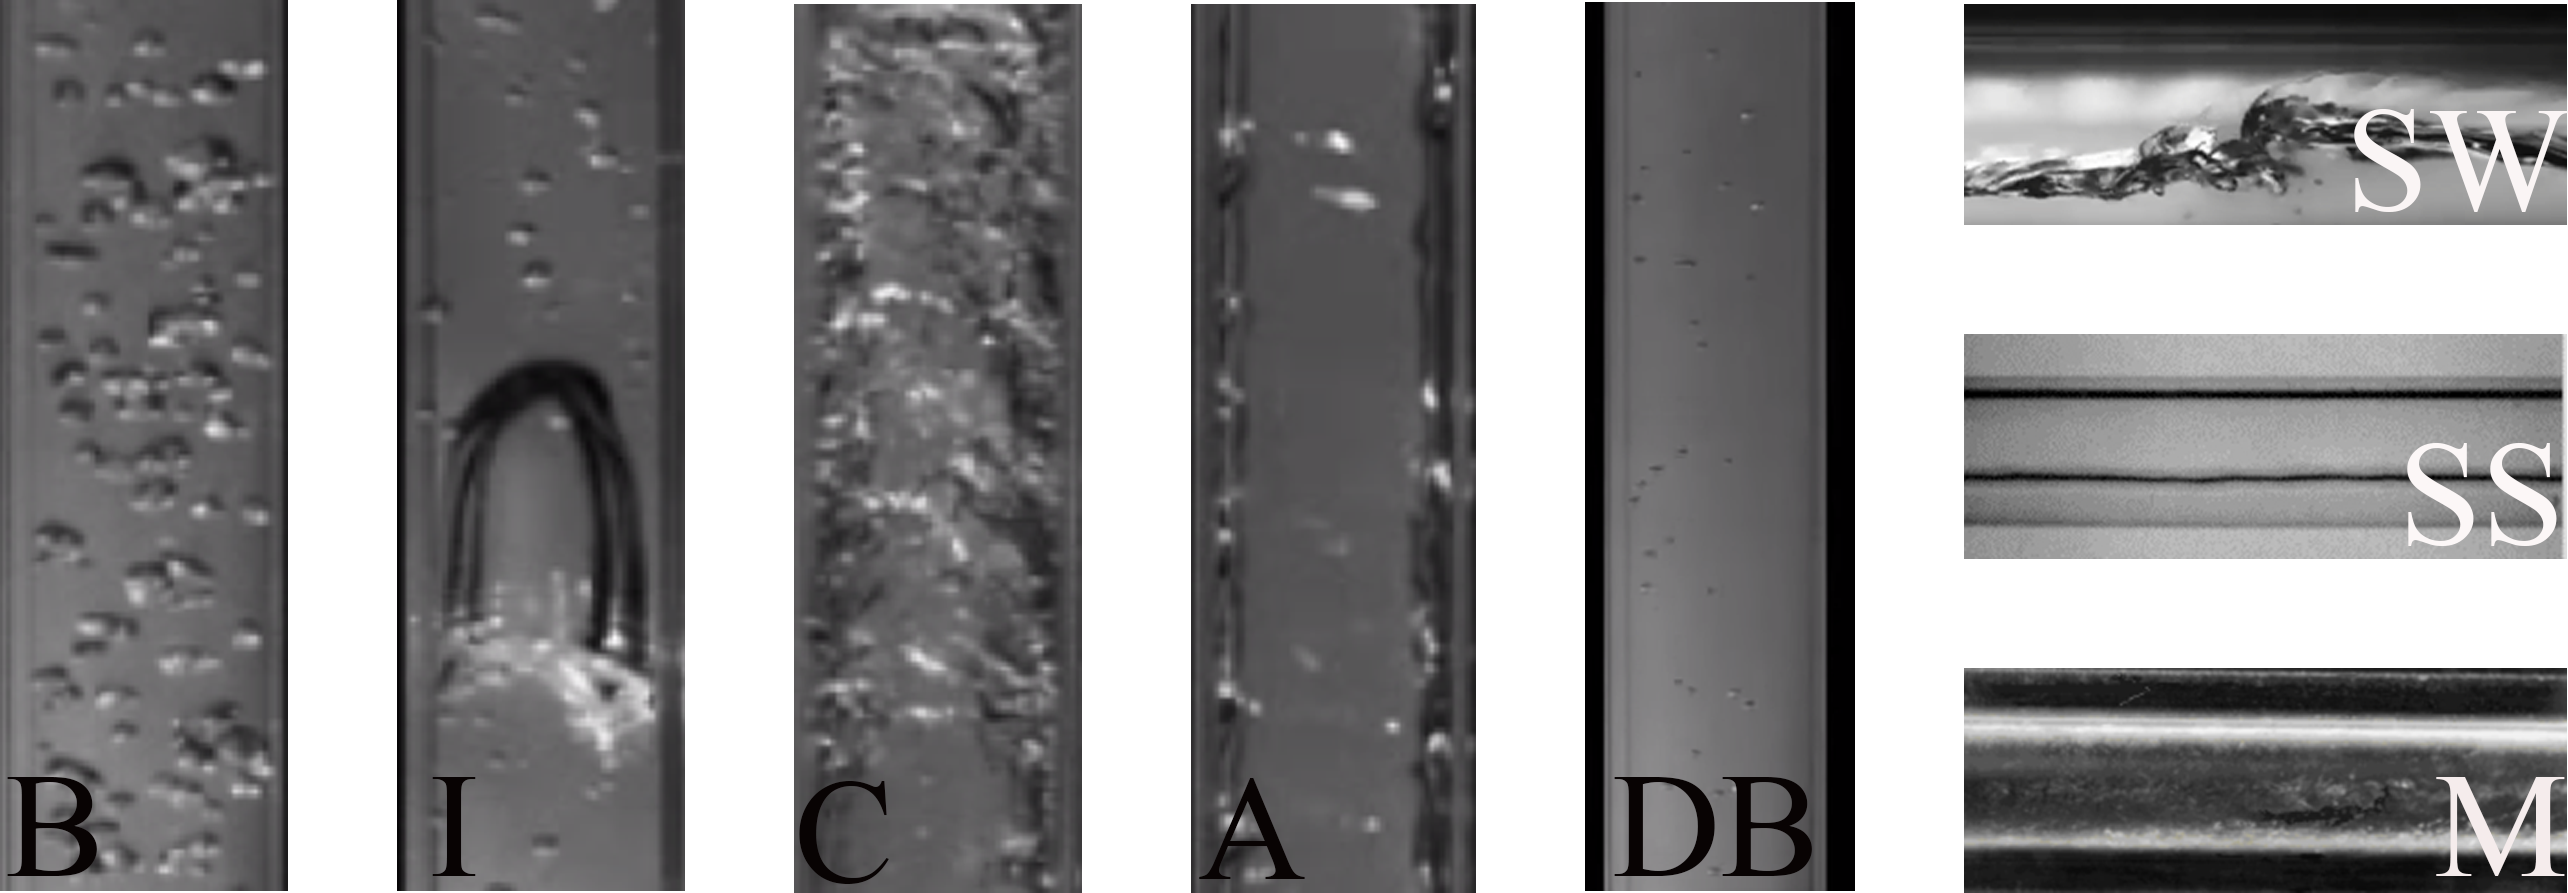

In [44]:
#Plot the distribution of data with respect to different features

#Evaluate whether the data is balanced across different classes

Text(0.5, 0, 'Angle ($\\theta$)')

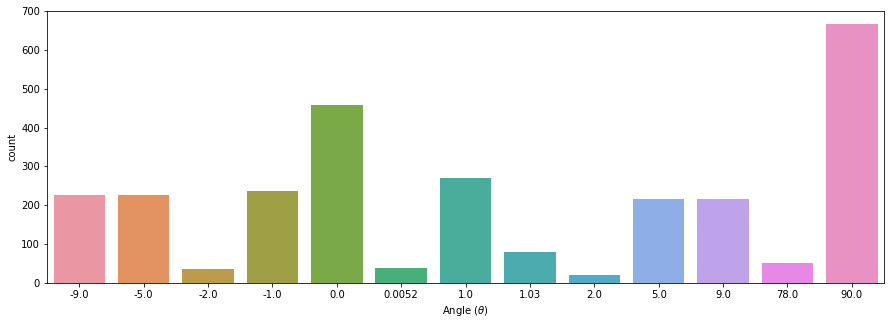

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Ang', data = data)
plt.xlabel(r'Angle ($\theta$)')

Text(0.5, 0, 'Internal Diameter ($m$)')

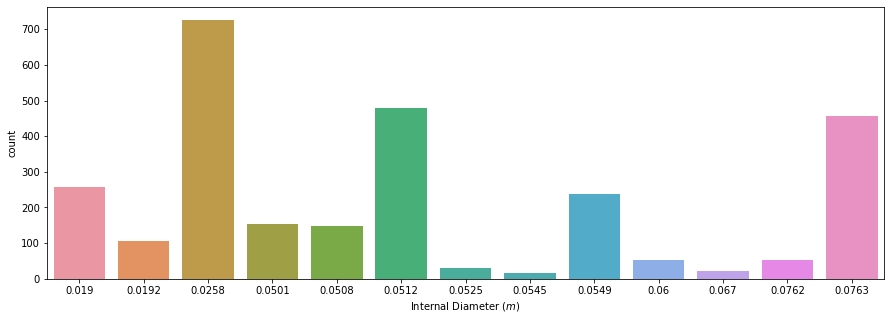

In [46]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'ID', data = data)
plt.xlabel(r'Internal Diameter ($m$)')

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text yticklabel objects>)

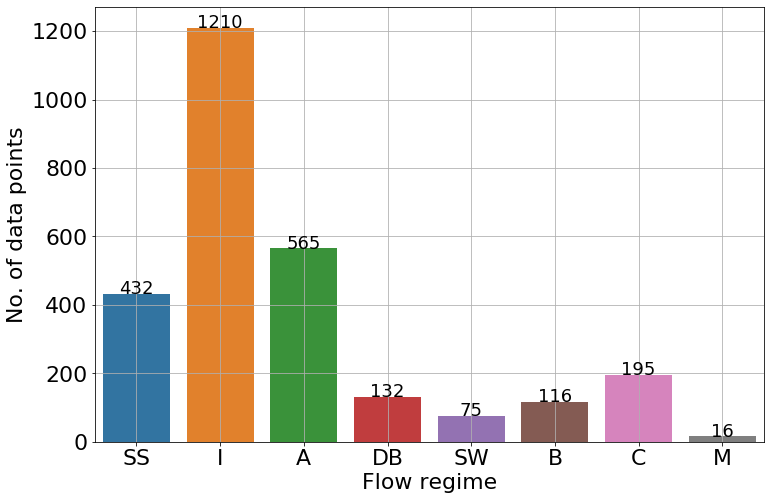

In [47]:
#data['Class_name']=data['Class_name'].replace(['SS', 'I', 'A', 'DB', 'SW', 'B', 'C', 'M'],['Stratified Smoth','Intermittent','Annular','Dispersed Bubble', 'Stratified Wavy','Bubble Flow','Churn','Mist'])
f=plt.figure(figsize = (12, 8))
ocean_plot = sns.countplot(x = 'Class_name', data = data)
for p in ocean_plot.patches:
    ocean_plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points',fontsize=18)
plt.grid()
#plt.title("Count of houses based on their proximity to ocean")
plt.xlabel("Flow regime",fontsize=22)
plt.ylabel("No. of data points",fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

In [49]:
Y=data[['Class_id']].values
X=data[['Vsl','Vsg','ID','Roughness','Ang','Density_L','Density_G','Visc_L','Visc_G','ST','P','T']].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

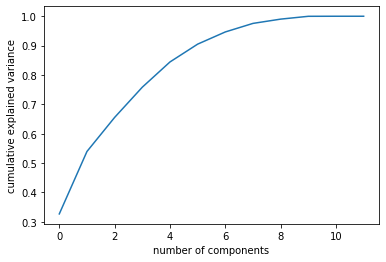

In [50]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [51]:
T = pca.fit_transform(X)
print(X.shape)
print(T.shape)

(2741, 12)
(2741, 12)


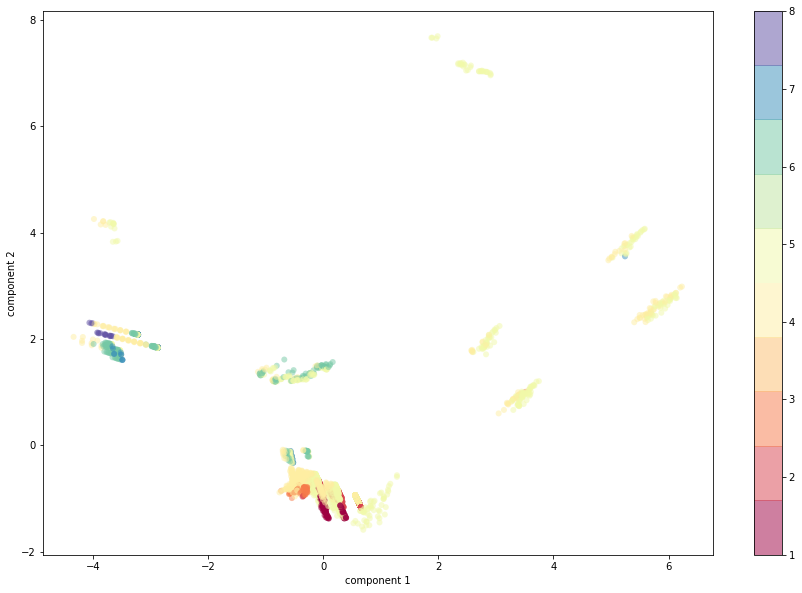

In [52]:
plt.figure(figsize=(15,10))
plt.scatter(T[:, 0], T[:, 1],
            c=Y.flatten(), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

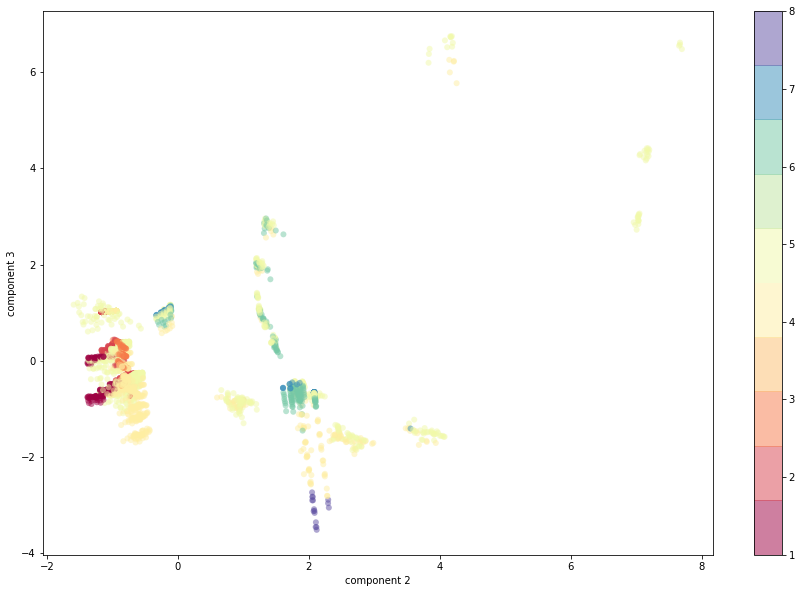

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(T[:, 1], T[:, 2],
            c=Y.flatten(), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar();

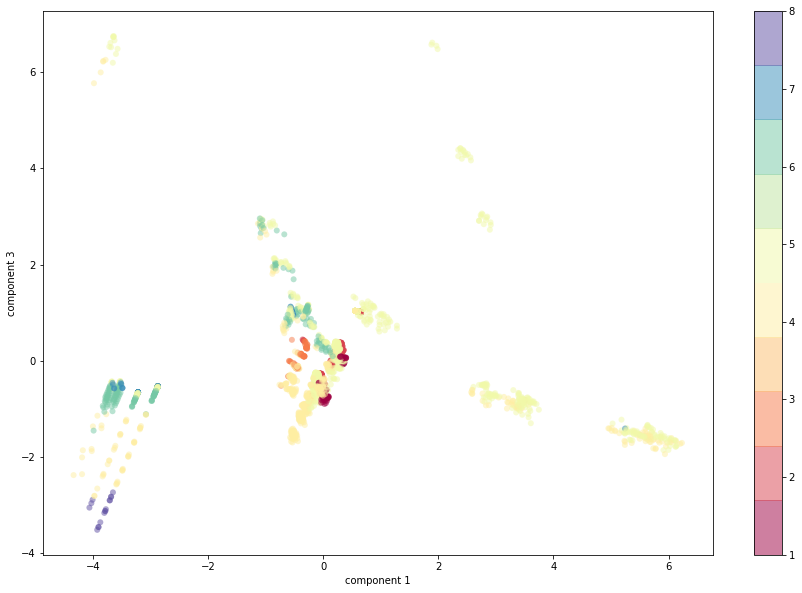

In [54]:
plt.figure(figsize=(15,10))
plt.scatter(T[:, 0], T[:, 2],
            c=Y.flatten(), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 3')
plt.colorbar();

In [55]:
P=pca.components_
T = X.dot(P.T)

In [56]:
print(P[0,:])

[ 0.02552881 -0.13395499  0.27106743  0.         -0.22302394 -0.42704226
  0.43878549 -0.06474952  0.02390186 -0.45773466  0.42281256  0.30038979]


First component  [ 0.02552881 -0.13395499  0.27106743  0.         -0.22302394 -0.42704226
  0.43878549 -0.06474952  0.02390186 -0.45773466  0.42281256  0.30038979]


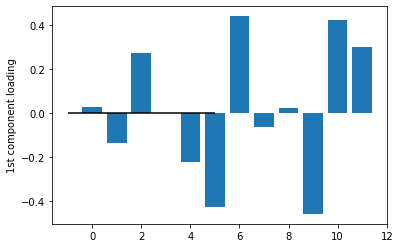

In [57]:
#Loading of the first component
print("First component ", P.T[:,0])
x = np.arange(12)
plt.bar(x, height= P.T[:,0])
plt.hlines(0,-1,5)
#plt.xticks(x+.1, ['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption'])
plt.ylabel("1st component loading")
plt.show()

# To Do

* Study the influence of normalization

* Improve the visualization (try putting the labels of the countries on the score plot)

* Explore other PCs

* Explain the contrbution of the different original features to the principal components

* Interpret the score plot in the light of th eloading plots

* Use first few principal components in combniation with any clustering algorithm to classify the flow patterns